# Data exploration and loading 💫

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mahmoudhallul","key":"fa6da2f60879cc442a8c9c963a2d4738"}'}

In [3]:
import os
if os.path.exists("kaggle (1).json"):
    os.rename("kaggle (1).json", "kaggle.json")


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile("asl-alphabet.zip", "r") as zip_ref:
    zip_ref.extractall("asl_alphabet")

In [7]:
data_path = "asl_alphabet/asl_alphabet_train"
print("Classes:", os.listdir(data_path)[:10])

Classes: ['asl_alphabet_train']


In [8]:
nested_path = os.path.join(data_path, "asl_alphabet_train")
print("Inside nested folder:", os.listdir(nested_path)[:10])

Inside nested folder: ['W', 'space', 'X', 'P', 'T', 'C', 'V', 'B', 'Z', 'del']


In [9]:
dataset_dir = "asl_alphabet/asl_alphabet_train/asl_alphabet_train"

In [10]:
# printing first 10 classes
classes = os.listdir(dataset_dir)
print(classes, classes[:10])

['W', 'space', 'X', 'P', 'T', 'C', 'V', 'B', 'Z', 'del', 'K', 'F', 'N', 'L', 'I', 'E', 'U', 'Q', 'D', 'Y', 'M', 'A', 'J', 'H', 'O', 'R', 'G', 'nothing', 'S'] ['W', 'space', 'X', 'P', 'T', 'C', 'V', 'B', 'Z', 'del']


In [11]:
# showing first 5 file names from first 5 classes
for col in classes[:5]:
  class_path = os.path.join(dataset_dir, col)
  files = os.listdir(class_path)[:5]
  print(col, os.listdir(class_path)[:5])
  for file in files:
    print(file)

W ['W1976.jpg', 'W1209.jpg', 'W1052.jpg', 'W1477.jpg', 'W1091.jpg']
W1976.jpg
W1209.jpg
W1052.jpg
W1477.jpg
W1091.jpg
space ['space2007.jpg', 'space205.jpg', 'space542.jpg', 'space2891.jpg', 'space339.jpg']
space2007.jpg
space205.jpg
space542.jpg
space2891.jpg
space339.jpg
X ['X648.jpg', 'X2249.jpg', 'X559.jpg', 'X1078.jpg', 'X1739.jpg']
X648.jpg
X2249.jpg
X559.jpg
X1078.jpg
X1739.jpg
P ['P979.jpg', 'P2994.jpg', 'P2985.jpg', 'P1139.jpg', 'P2867.jpg']
P979.jpg
P2994.jpg
P2985.jpg
P1139.jpg
P2867.jpg
T ['T2621.jpg', 'T145.jpg', 'T548.jpg', 'T215.jpg', 'T1672.jpg']
T2621.jpg
T145.jpg
T548.jpg
T215.jpg
T1672.jpg


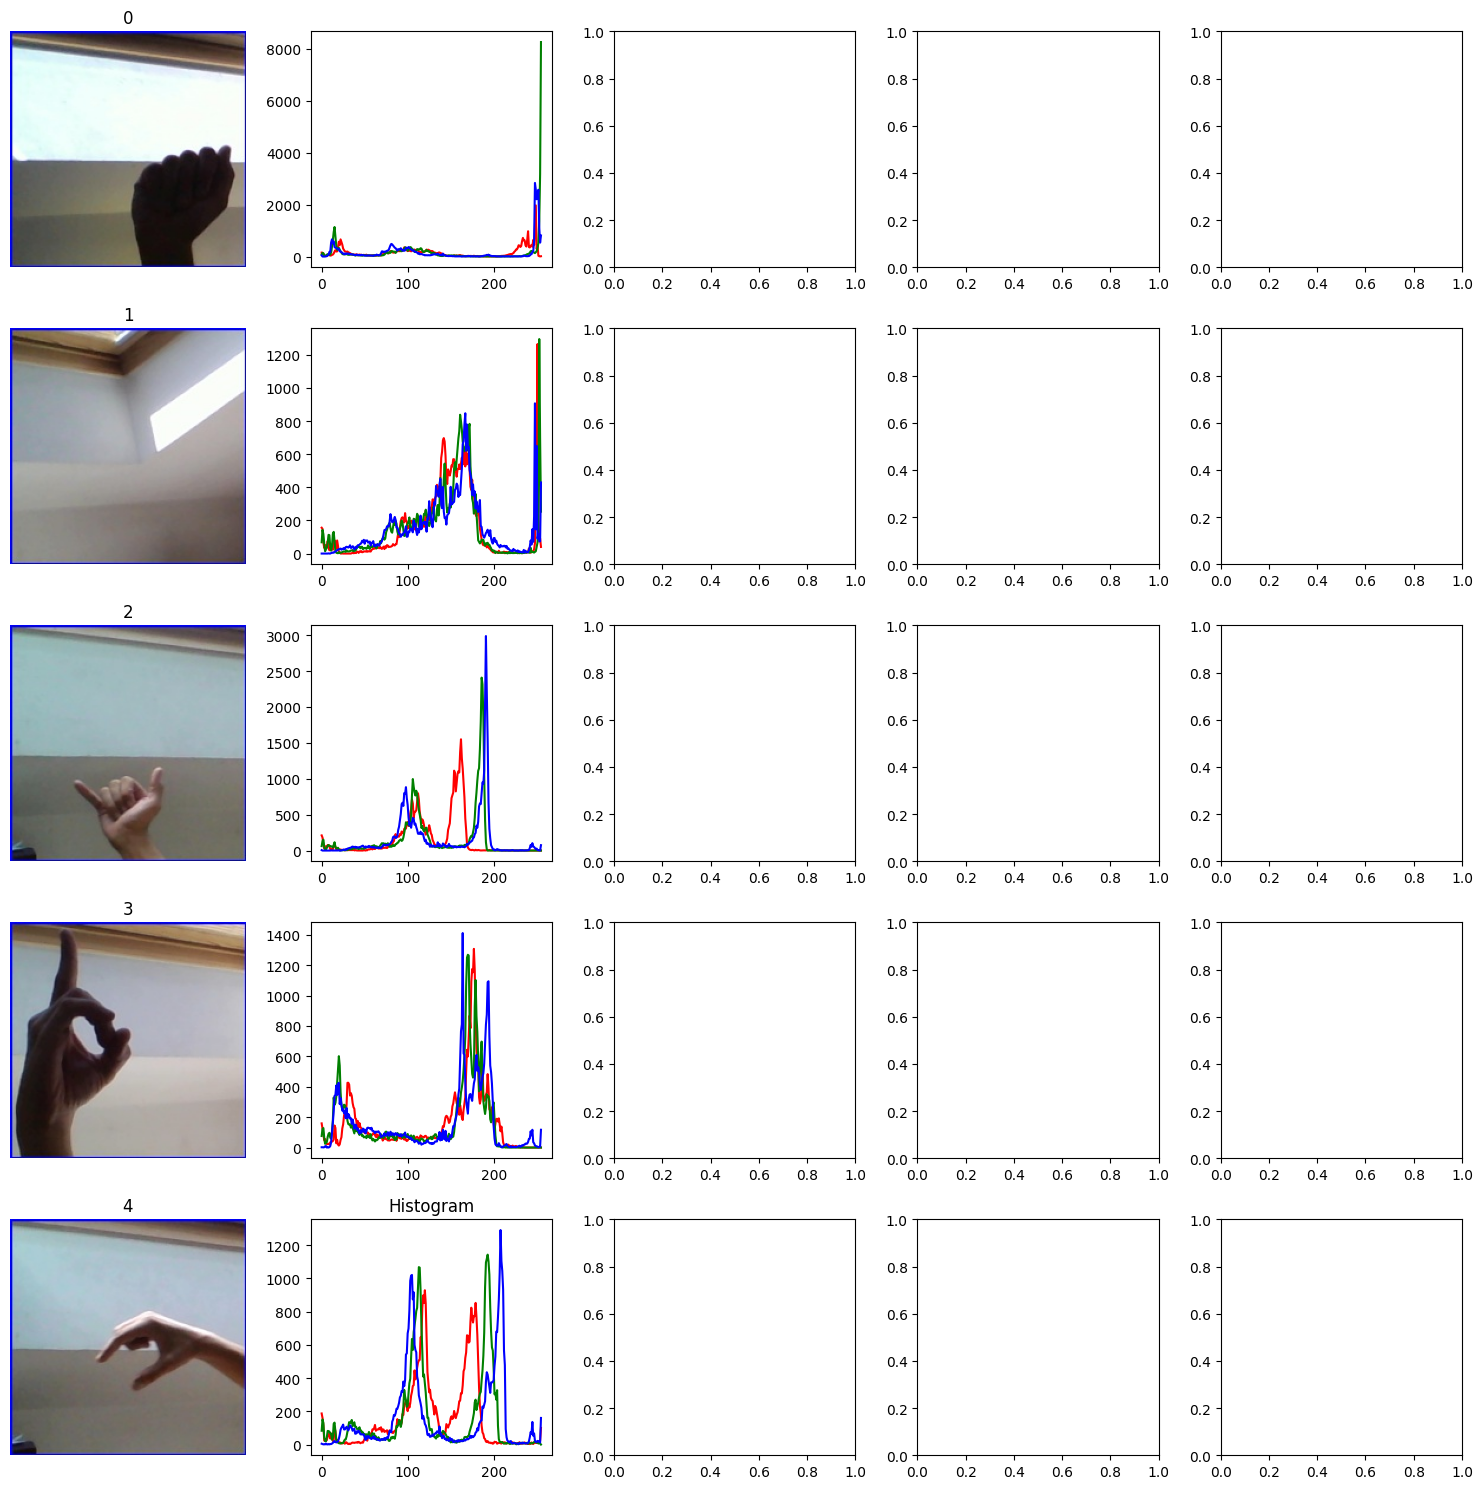

In [12]:
# visualizing random images using histogram
import matplotlib.pyplot as plt
import random as rand
import cv2
import numpy as np
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
random_classes = rand.sample(os.listdir(dataset_dir), 5)
for random_class,col in enumerate(random_classes):
   classes_path = os.path.join(dataset_dir, col)
   random_file = rand.choice(os.listdir(classes_path))
   random_file_path = os.path.join(classes_path, random_file)
   img_bgr = cv2.imread(random_file_path)
   img_converted = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

   axes[random_class,0].imshow(img_converted)
   axes[random_class,0].axis('off')
   axes[random_class,0].set_title(random_class)

    # Histogram
   colors = ('r','g','b')
   for j, col in enumerate(colors):
        hist = cv2.calcHist([img_converted],[j],None,[256],[0,256])
        axes[random_class,1].plot(hist, color=col)
axes[random_class,1].set_title("Histogram")

plt.tight_layout()
plt.show()

# insights: 📓

*   high intensity indicated on x_axis which means that most of the images have a bright background dominating images
*  noticable peaks: indicates that separation between hand and background contrast is significant
*   red is dominant in some images as the skin usually has higher red intensity

# observations: ♦

* Data consists of skewed distributed histograms which must be normalized  
* most pixels consist of the background not the hand making a risk of bias
* color info is important as RGB shows skintones vs background so grey scaling wont be applied

Found 87000 files belonging to 29 classes.
Using 87000 files for training.
Range: 3000-3000 | Imbalance Ratio: 1.00
 Balanced

Class Distribution:
A: 3000
B: 3000
C: 3000
D: 3000
E: 3000
F: 3000
G: 3000
H: 3000
I: 3000
J: 3000
K: 3000
L: 3000
M: 3000
N: 3000
O: 3000
P: 3000
Q: 3000
R: 3000
S: 3000
T: 3000
U: 3000
V: 3000
W: 3000
X: 3000
Y: 3000
Z: 3000
del: 3000
nothing: 3000
space: 3000


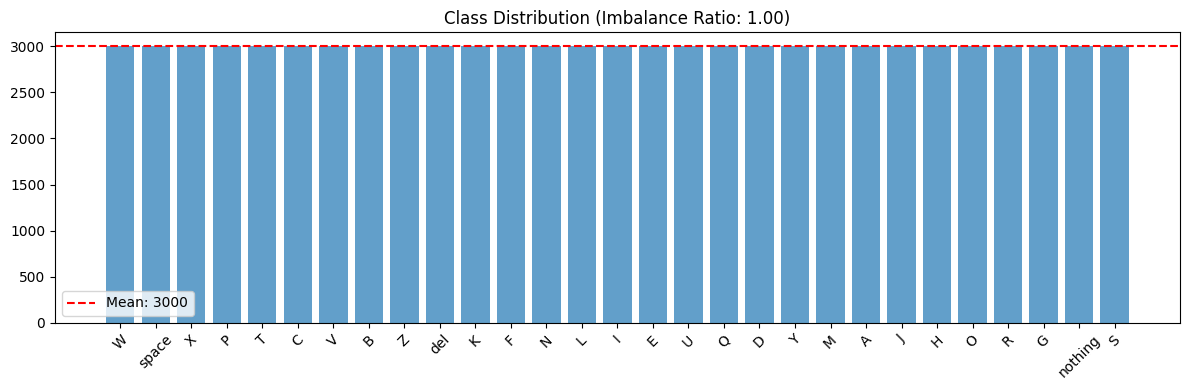

{'W': 3000,
 'space': 3000,
 'X': 3000,
 'P': 3000,
 'T': 3000,
 'C': 3000,
 'V': 3000,
 'B': 3000,
 'Z': 3000,
 'del': 3000,
 'K': 3000,
 'F': 3000,
 'N': 3000,
 'L': 3000,
 'I': 3000,
 'E': 3000,
 'U': 3000,
 'Q': 3000,
 'D': 3000,
 'Y': 3000,
 'M': 3000,
 'A': 3000,
 'J': 3000,
 'H': 3000,
 'O': 3000,
 'R': 3000,
 'G': 3000,
 'nothing': 3000,
 'S': 3000}

In [13]:
from collections import Counter
# a function that is used to check data imbalancement
def check_balance(dataset_dir):
    # Count files in each class folder
    class_counts = {folder: len([f for f in os.listdir(os.path.join(dataset_dir, folder))
                          if f.endswith(('.jpg', '.png', '.jpeg'))])
              for folder in os.listdir(dataset_dir)
              if os.path.isdir(os.path.join(dataset_dir, folder))}

    # Statistics computations
    vals = list(class_counts.values())
    total_samples, num_classes = sum(vals), len(vals)
    min_samples, max_samples, mean_samples = min(vals), max(vals), sum(vals)/len(vals)
    imbalance_ratio = max_samples / min_samples

    # Results
    print(f"Found {total_samples} files belonging to {num_classes} classes.")
    print(f"Using {total_samples} files for training.")
    print(f"Range: {min_samples}-{max_samples} | Imbalance Ratio: {imbalance_ratio:.2f}")
    print(" Balanced" if imbalance_ratio <= 1.5 else "Imbalanced" if imbalance_ratio <= 3 else "Severely Imbalanced")

    # Show distribution
    print("\nClass Distribution:")
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count}")

    plt.figure(figsize=(12, 4))
    plt.bar(class_counts.keys(), class_counts.values(), alpha=0.7)
    plt.axhline(y=mean_samples, color='red', linestyle='--', label=f'Mean: {mean_samples:.0f}')
    plt.title(f'Class Distribution (Imbalance Ratio: {imbalance_ratio:.2f})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return class_counts

def check_tf_balance(train_ds):
    all_labels = [label.numpy() for _, label_batch in train_ds for label in label_batch]
    label_counts = Counter(all_labels)
    imbalance_ratio = max(label_counts.values()) / min(label_counts.values())

    print(f"Train batches: {len(list(train_ds))}")
    print(f"Found {len(all_labels)} files belonging to {len(label_counts)} classes.")
    print("Label Distribution:", dict(sorted(label_counts.items())))

    return label_counts

check_balance("asl_alphabet/asl_alphabet_train/asl_alphabet_train")

# Observation:
data is perfectly balanced with 3000 samples in each class ⚡


# **Dataset preprocessing based on the previous observations ⭐**

In [14]:
# Training dataset
import tensorflow as tf
img_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # split training set into 80/20
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [15]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [16]:
# Normalization & augmentation
normalization_layer = tf.keras.layers.Rescaling(1./255)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2),
])


In [17]:
# Apply scaling + augmentation
train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))



In [18]:
# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
print("Train batches:", len(train_ds))
print("Validation batches:", len(val_ds))

Train batches: 2175
Validation batches: 544


# Visualizing data after cleaning 📊

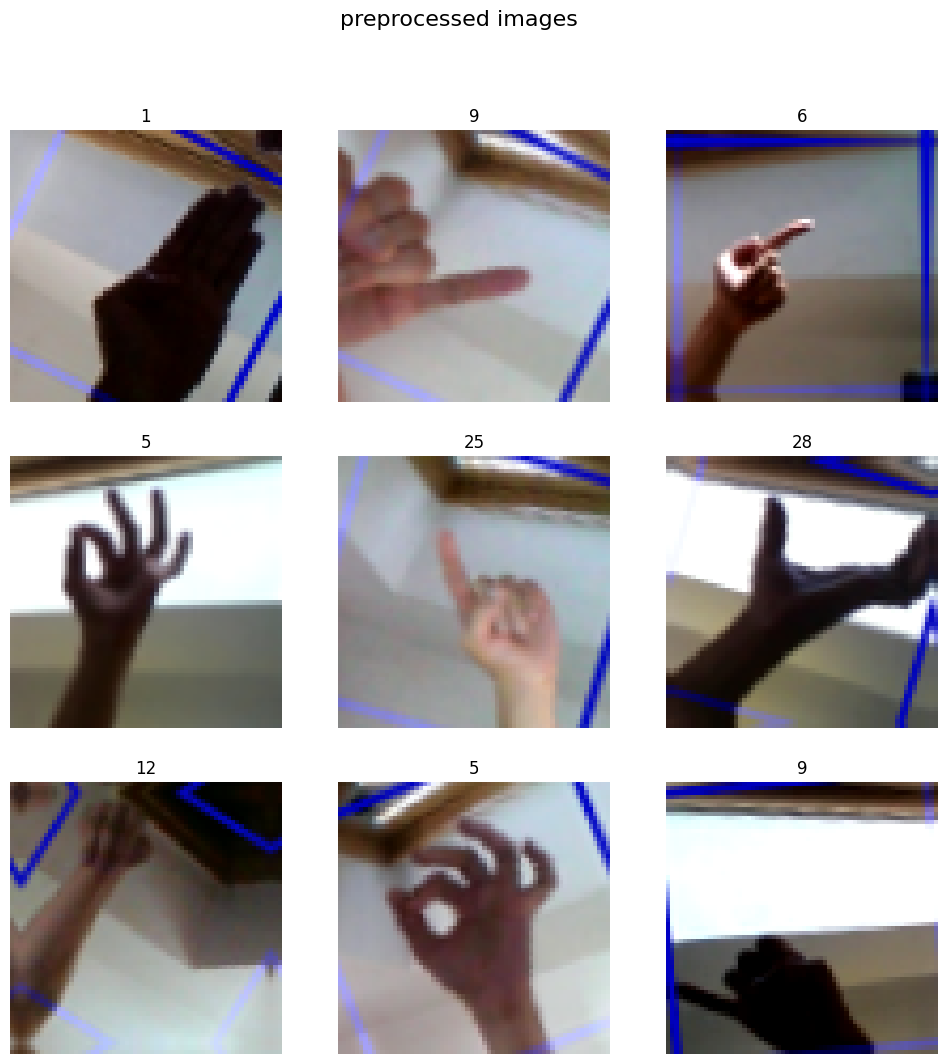

In [72]:
# Take one batch from the training dataset
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    plt.title(int(label_batch[i].numpy()))
    plt.axis("off")
plt.suptitle("preprocessed images", fontsize=16)
plt.show()




```
# This is formatted as code
```

# Final Observations:

*   Blue frame indicates standaradize preprocessing
*   The hand is clearly visible now
*   images have proper lightning conditions
*   background is not dominant


# CNN

In [34]:
from tensorflow.keras import layers, models


## Defining the CNN

In [35]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train

In [37]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 629s 266ms/step - accuracy: 0.3102 - loss: 2.3280 - val_accuracy: 0.7644 - val_loss: 0.6890
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 506s 232ms/step - accuracy: 0.8110 - loss: 0.5625 - val_accuracy: 0.9078 - val_loss: 0.2770
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 509s 234ms/step - accuracy: 0.9069 - loss: 0.2722 - val_accuracy: 0.9145 - val_loss: 0.2611
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 528s 243ms/step - accuracy: 0.9379 - loss: 0.1798 - val_accuracy: 0.9486 - val_loss: 0.1484
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 523s 240ms/step - accuracy: 0.9560 - loss: 0.1314 - val_accuracy: 0.9421 - val_loss: 0.1721
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 517s 238ms/step - accuracy: 0.9641 - loss: 0.1061 - val_accuracy: 0.9516 - val_loss: 0.1430
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 508s 234ms/step - accuracy: 0.9685 - loss: 0.0940 - val_accuracy: 0.9219 - val_loss: 0.2836
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 519s 239ms/step - ac

## Evaluate

In [38]:
loss, acc = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")


544/544 ━━━━━━━━━━━━━━━━━━━━ 36s 67ms/step - accuracy: 0.9592 - loss: 0.1388
Validation Loss: 0.1324
Validation Accuracy: 0.9604


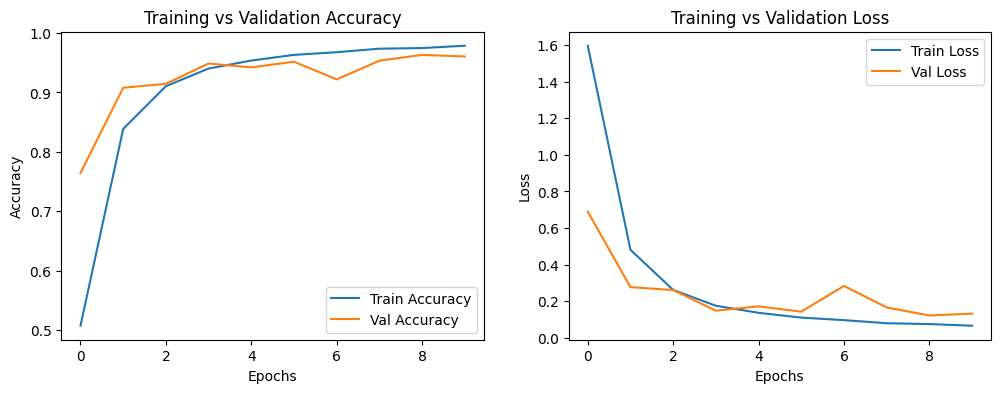

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()


In [40]:
#Saving the model as .h5
model.save("cnn_model.h5")

## Applying the model on the 28 test images

In [64]:
import os
dataset_dir_test="asl_alphabet/asl_alphabet_test/asl_alphabet_test"
# Collect all jpg file paths
test_image_paths = [os.path.join(dataset_dir_test, fname)
                    for fname in os.listdir(dataset_dir_test) if fname.endswith(".jpg")]

# Extract labels from filenames (before "_test.jpg")
test_labels = [os.path.basename(p).split("_")[0] for p in test_image_paths]

print("Sample filenames:", test_image_paths[:])
print("Extracted labels:", test_labels[:])


Sample filenames: ['asl_alphabet/asl_alphabet_test/asl_alphabet_test/L_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/E_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/space_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/F_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/W_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/S_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/Y_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/K_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/H_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/C_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/U_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/D_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/N_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/Q_test.jpg', 'asl_alphabet/asl_alphabet_test/asl_alphabet_test/O_test.jpg', 'asl_alphabet/asl_alphabet_test/

In [65]:
import numpy as np

# Map labels to integers
unique_labels = sorted(set(test_labels))
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

y_test_true = np.array([label_to_index[label] for label in test_labels])

print("Label mapping:", label_to_index)
print("True labels shape:", y_test_true.shape)


Label mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'nothing': 26, 'space': 27}
True labels shape: (28,)


In [66]:
import tensorflow as tf

def load_and_preprocess_with_label(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)
    return img, label

# Build dataset
test_ds = tf.data.Dataset.from_tensor_slices((test_image_paths, y_test_true))
test_ds = test_ds.map(load_and_preprocess_with_label, num_parallel_calls=AUTOTUNE)

# Apply your preprocessing
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE).batch(batch_size)


In [68]:
y_test_pred = model.predict(test_ds)
y_test_pred_classes = y_test_pred.argmax(axis=1)

from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Test Accuracy: 0.8928571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [71]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test_true, y_test_pred_classes)
print(f"Accuracy: {acc:.2%}")
print(f"Correct predictions: {int(acc * len(y_test_true))}/{len(y_test_true)}")


Accuracy: 89.29%
Correct predictions: 25/28
